## Installation and First Steps with MXNet

MXNet is not pre-installed in the Colab notebooks, but before installing it we need to figure out which version of CUDA Colab is running on the background. For this we just run a simple command:

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:18:20_PST_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0


## CUDA and MXNet

Now that we now what version of CUDA the Colab notebooks is using we have to match it with the MXNet's pip package. In this case, Colab is using CUDA 10.0 so we add 'cu100' to the name of the package:

In [ ]:
!pip install mxnet-cu116
!pip install gluoncv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.0/509.0 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.3 MB/s eta 0:00:00


That was really straightforward. Now let's check the version of MXNet we've just installed:

In [ ]:
import mxnet as mx

print(mx.__version__)

1.9.1


In [ ]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_alpha_pose, heatmap_to_coord_alpha_pose
import cv2 as cv

/usr/local/lib/python3.8/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.13.1+cu116` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [ ]:
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('alpha_pose_resnet101_v1b_coco', pretrained=True)

# Note that we can reset the classes of the detector to only include
# human, so that the NMS process is faster.

detector.reset_class(["person"], reuse_weights=['person'])

In [92]:
import time
import numpy as np
def get_video_images(video_path):
  cap = cv.VideoCapture(video_path)
  nr_imagine = 0
  imagini = []
  ret = True
  while(cap.isOpened()):
    if nr_imagine % 10 == 0:
      print("Am citit", nr_imagine)
    if ret == True:
      nr_imagine+=1
      ret, imagine = cap.read()
      imagini.append(imagine)
    else:
      break

  imagini.pop(len(imagini)-1)

  cap.release()
  imagini = np.array(imagini)
  #print(imagini[0])
  return imagini


def get_data(detector, pose_net):
  x_timer = time.perf_counter()
  imagine1 = get_video_images("p1_bslice_s2.avi")
  numar_imagine = 0
  for imagine in imagine1:
    numar_imagine+=1
    print(numar_imagine)
    imagine = mx.nd.array(imagine)
    #imagine = imagine.as_in_context(mx.gpu(0))
    x, img = data.transforms.presets.yolo.transform_test(imagine, short=512)
    class_IDs, scores, bounding_boxs = detector(x)
    pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs)
    predicted_heatmap = pose_net(pose_input)
    pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)
  
  y_timer = time.perf_counter()

  print(y_timer-x_timer, "seconds")
  #print(pred_coords, upscale_bbox, pose_input)


In [ ]:
#im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
#                          'gluoncv/pose/soccer.png?raw=true',
#                          path='soccer.png')
#print(type(im_fname))
imagine = cv.imread("poza.jpg")
imagine = mx.nd.array(imagine)
x, img = data.transforms.presets.yolo.transform_test(imagine, short=512)
#x, img = data.transforms.presets.yolo.load_test('poza.jpg', short=512)
print('Shape of pre-processed image:', x.shape)

class_IDs, scores, bounding_boxs = detector(x)

Shape of pre-processed image: (1, 3, 512, 910)


In [ ]:
pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs)

In [ ]:
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)
print(pred_coords)


[[[509.53906 141.80469]
  [512.39844 141.80469]
  [512.39844 138.94531]
  [520.97656 147.52344]
  [523.83594 150.38281]
  [532.41406 150.38281]
  [535.27344 158.96094]
  [532.41406 118.92969]
  [535.27344 118.92969]
  [523.83594  87.47656]
  [523.83594  87.47656]
  [561.0078  241.88281]
  [552.4297  247.60156]
  [589.60156 281.91406]
  [561.0078  304.78906]
  [561.0078  330.52344]
  [558.14844 333.3828 ]]]
<NDArray 1x17x2 @cpu(0)>


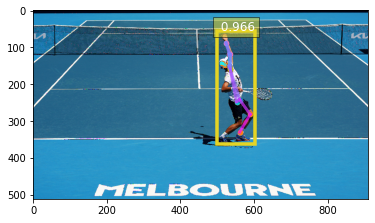

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.5, keypoint_thresh=0.2)

plt.show()

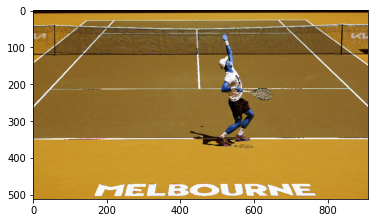

In [ ]:
plt.imshow(img)
plt.show()

In [93]:
get_data(detector, pose_net)

Am citit 0
Am citit 10
Am citit 20
Am citit 30
Am citit 40
Am citit 50
Am citit 60
Am citit 70
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
79.90988977100005 seconds
